#Adimplentes ou inadimplentes?

##1- Motivação da análise

Bancos e instituições financeiras em geral, principalmente aquelas que prestam serviços de crédito, fazem parte de um sistema de transações econômicas extremamente sensível. Quando um banco recebe um depósito de um cliente, uma parte desse depósito (que varia de acordo com uma taxa definida pelo BACEN) pode ser utilizada para fazer empréstimos a outros clientes, de forma que o dono do depósito inicial não perca um centavo sequer. Ou seja, ocorre a "criação" de moeda. Assim, a partir da devolução do empréstimo acrescido de
juros, o banco obtém seu lucro. Portanto, é necessária a verificação constante
de todos os clientes, para garantir que estejam pagando o que devem. Caso contrário, a instituição pode enfrentar problemas, não apenas de natureza econômica, mas também em relação à sua imagem.
Sendo assim, a análise serve para examinar possíveis fatores que podem afetar um cliente a pagar as suas contas ou não, dessa forma a instituição poderá tomar uma atitude em relação a esse cliente.

##2- Importação de bibliotecas e exploração do Dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


----

##2.1- Análise de dados faltantes

In [ ]:
print(df.shape, '\n')
df.isna().sum()   #Há três colunas com dados faltantes

(10127, 16) 



id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [ ]:
adimplentes = df['default'].value_counts()[0]
inadimplentes = df['default'].value_counts()[1]
df['default'].value_counts()

0    8500
1    1627
Name: default, dtype: int64

In [ ]:
print(f'A proporção de adimplentes/inadimplentes é {round((adimplentes/len(df.index))*100, 2)}%\n')
print(f'A proporção de adimplentes/inadimplentes é {round((inadimplentes/len(df.index))*100, 2)}%')

A proporção de adimplentes/inadimplentes é 83.93%

A proporção de adimplentes/inadimplentes é 16.07%


In [ ]:
df.dropna(inplace = True)
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,M,1,ensino medio,solteiro,$60K - $80K,blue,34,5,0,2,"13.940,62","15.577,67",114
10121,713899383,0,56,F,1,mestrado,solteiro,menos que $40K,blue,50,4,4,1,"3.688,95","14.596,49",120
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60


In [ ]:
df.shape

(7081, 16)

In [ ]:
df.isna().sum()  #O Dataframe não apresenta mais dados faltantes

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [ ]:
adimplentes = df['default'].value_counts()[0]
inadimplentes = df['default'].value_counts()[1]
df['default'].value_counts()

0    5968
1    1113
Name: default, dtype: int64

Verificando a proporção de adimplente e inadimplentes

In [ ]:
print(f'A proporção de adimplentes/inadimplentes é {round((adimplentes/len(df.index))*100, 2)}%\n')  #A proporção não sofreu grandes alterações.
print(f'A proporção de adimplentes/inadimplentes é {round((inadimplentes/len(df.index))*100, 2)}%')
df.head(11)

A proporção de adimplentes/inadimplentes é 84.28%

A proporção de adimplentes/inadimplentes é 15.72%


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32
12,710599683,0,56,M,1,graduacao,solteiro,$80K - $120K,blue,36,3,0,6,"11.751,09","1.539,95",17
14,712396908,0,57,F,2,mestrado,casado,menos que $40K,blue,48,5,2,2,"2.436,00","1.570,23",29
16,709967358,0,48,M,4,doutorado,solteiro,$80K - $120K,blue,36,6,3,2,"30.367,57","1.671,12",27


----

##2.2- Tratando variáveis numerais

In [ ]:
df.dtypes    #limite_credito e valor_transacoes_12m devem ser int

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [ ]:
fn = lambda valor: float(valor.replace('.', '').replace(',', '.'))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

----

##3- Visualização de dados

In [ ]:
df[df['default'] == 0]
df[df['default'] == 1]

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
127,720201033,1,53,M,2,mestrado,casado,$80K - $120K,blue,41,3,2,3,11669.07,720.82,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,714471183,1,47,M,4,mestrado,divorciado,$80K - $120K,blue,39,4,4,3,17504.75,10468.03,66
10112,708564858,1,33,M,2,graduacao,casado,$120K +,gold,20,2,4,1,34516.84,9338.74,73
10113,713733633,1,27,M,0,ensino medio,divorciado,$60K - $80K,blue,36,2,2,3,13303.99,10219.66,85
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60


----

###3.1- Proporção de inadimplencia por faixa salarial

In [ ]:
freq = pd.crosstab(df['default'], df['salario_anual'])
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin       #dataframe com a proporção percentual de adimplentes e inadimplentes por faixa de salário

salario_anual,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,menos que $40K
default,,,,,
0,0.078753,0.202413,0.160523,0.169739,0.388572
1,0.091644,0.183288,0.130279,0.169811,0.424978


salario_anual,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,menos que $40K
default,,,,,
0,0.078753,0.202413,0.160523,0.169739,0.388572
1,0.091644,0.183288,0.130279,0.169811,0.424978


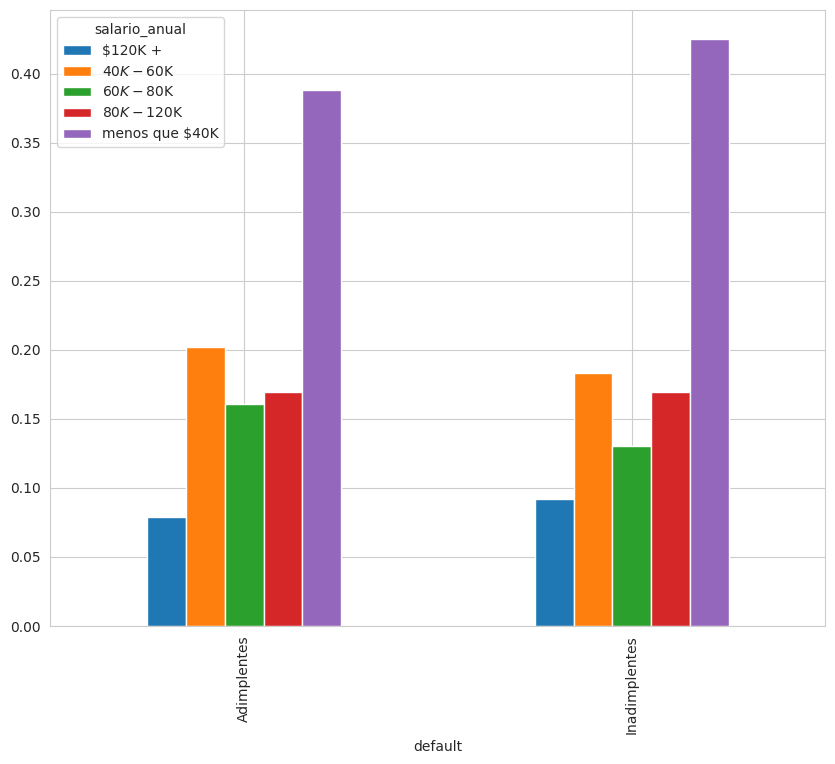

In [ ]:
freq_pctlin.plot.bar()

plt.gca().set_xticklabels(['Adimplentes','Inadimplentes'])
freq_pctlin

----

###3.2- Estudo da influência da quantidade de dependentes para a inadimplência


In [ ]:
df_adi = df[df['default'] == 0]
df_inad = df[df['default'] == 1]

In [ ]:
#Proporção da quantidade de dependentes por faixa salarial
freq1 = pd.crosstab(df['dependentes'], df['salario_anual'])
freq_pctlin1 = freq1.div(freq1.sum(axis = 1), axis = 0)
freq2 = pd.crosstab(df_adi['dependentes'], df_adi['salario_anual'])
freq_pctlin2 = freq2.div(freq2.sum(axis = 1), axis = 0)
freq3 = pd.crosstab(df_inad['dependentes'], df_inad['salario_anual'])
freq_pctlin3 = freq3.div(freq3.sum(axis = 1), axis = 0)

Text(0.5, 1.0, 'Clientes inadimplentes')

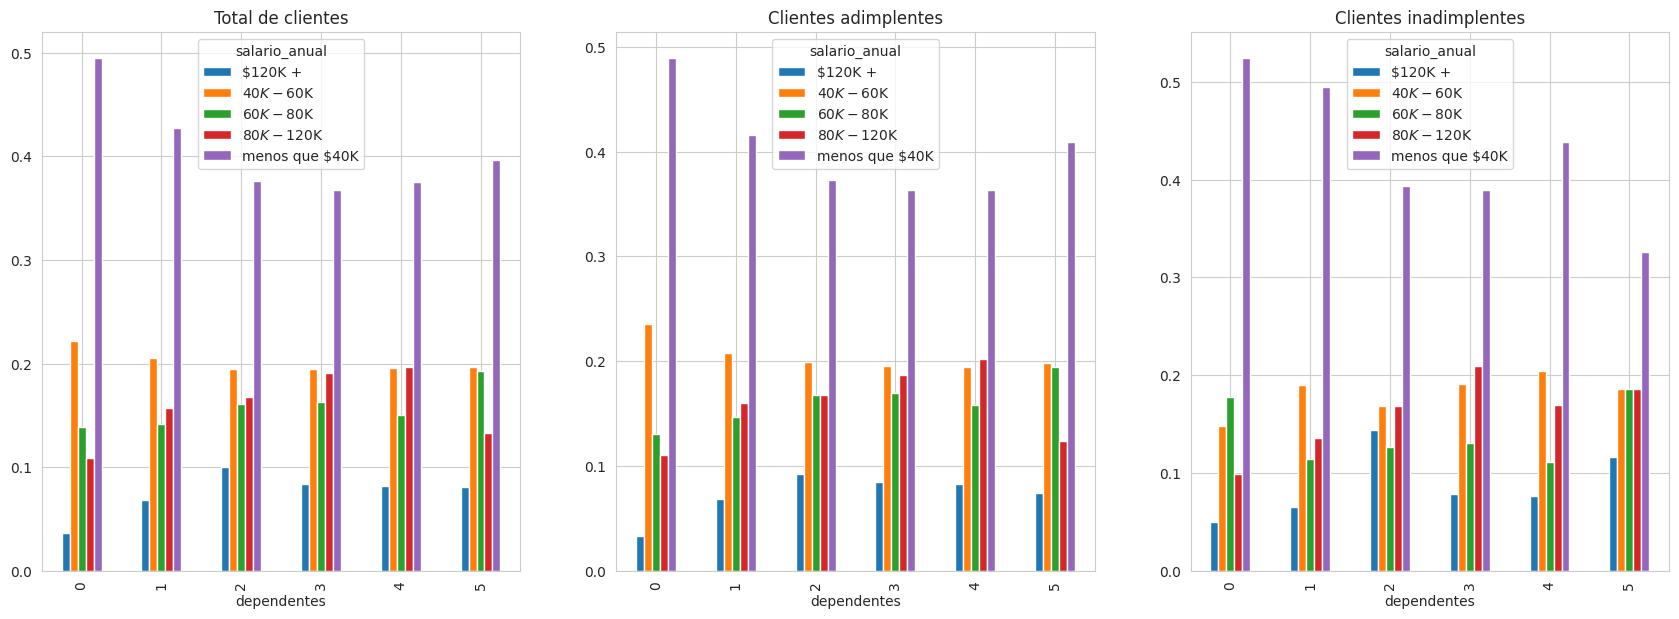

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

freq_pctlin1.plot.bar(ax=ax1)
ax1.set_title('Total de clientes')
freq_pctlin2.plot.bar(ax=ax2)
ax2.set_title('Clientes adimplentes')
freq_pctlin3.plot.bar(ax=ax3)
ax3.set_title('Clientes inadimplentes')

----

###3.3- Estudo da influência do valor das transações e meses de relacionamento

<Axes: xlabel='valor_transacoes_12m', ylabel='qtd_transacoes_12m'>

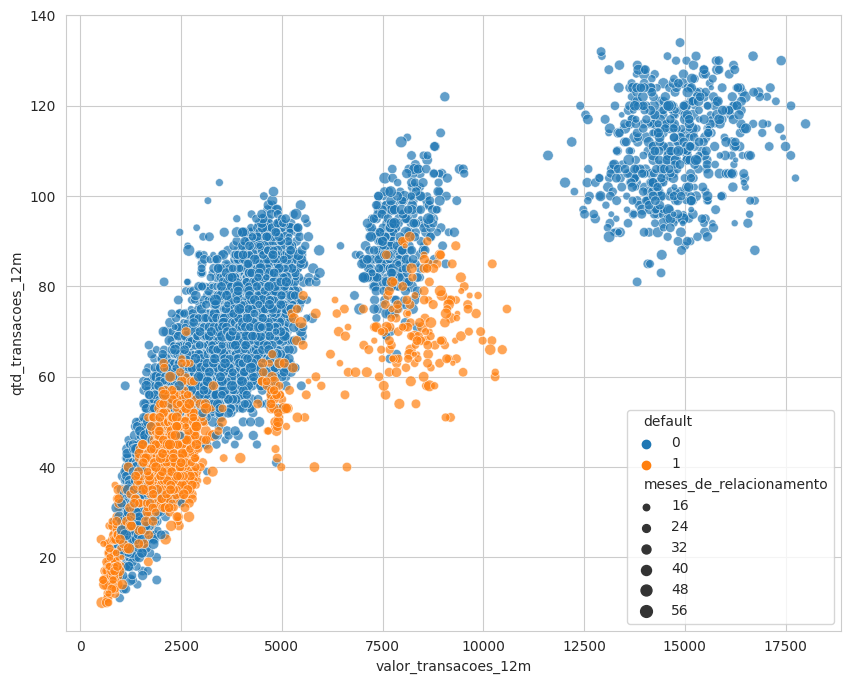

In [ ]:
sns.scatterplot(x = 'valor_transacoes_12m'
                , y = 'qtd_transacoes_12m'
                , data = df
                , alpha = .7
                , hue = 'default'
                , size = 'meses_de_relacionamento'
               )

[Text(0, 0, 'Adimplentes'), Text(1, 0, 'Inadimplentes')]

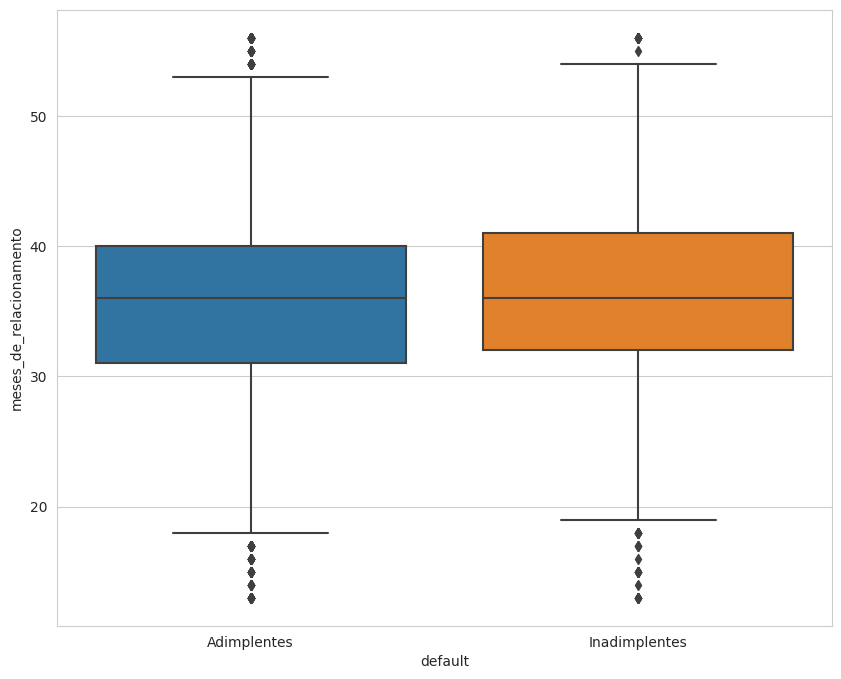

In [ ]:
sns.boxplot(x='default', y='meses_de_relacionamento', data=df)
plt.gca().set_xticklabels(['Adimplentes','Inadimplentes'])

[Text(0, 0, 'Adimplentes'), Text(1, 0, 'Inadimplentes')]

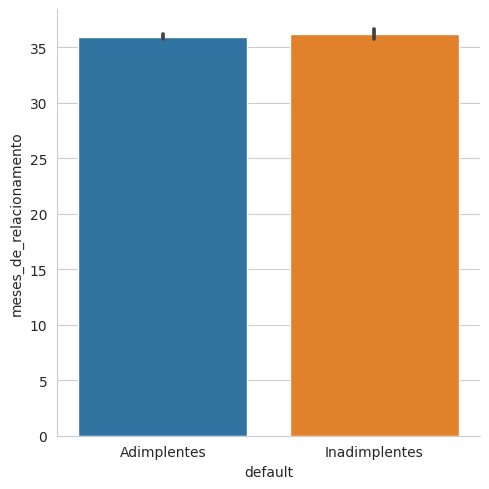

In [ ]:
sns.catplot(x = 'default', y = 'meses_de_relacionamento', kind = 'bar', data = df)
plt.gca().set_xticklabels(['Adimplentes','Inadimplentes'])

----

# 4- Conclusões e insights

##Faixa salarial

A proporção da quantidade de clientes nas categorias de faixas salariais é, de forma geral, equivalente nos gráficos de adimplentes e inadimplentes. Os clientes que estão categorizados com menos de quarenta mil reais anuais são os mais representativos em ambos os gráficos. Isso se deve ao fato de eles serem a maioria. No entanto, dentro desse mesmo grupo de clientes, a porcentagem de inadimplência (42%) é superior à porcentagem de adimplentes (38%). Sendo assim, os clientes que ganham menos podem ter menos chances de quitar suas dívidas."

----

##Quantidade de dependentes

Com a adição da variável 'dependentes', que está relacionada à quantidade de filhos dos clientes, é possível observar ainda mais as discrepâncias entre os clientes de diferentes faixas salariais.

1.   É possível observar que dos clientes com menos de 40k anuais são mais expressivos no gráfico de inadimplentes para a quantidade de 0 até 4 dependentes, confirmando a influência salarial para a inadimplência. Curiosamente os clientes com 5 dependentes possuem mais chances de quitarem as contas.
2.   Outra observação é que os clientes da segunda menor faixa salarial(60k a 80k anuais), são consideravelmente mais expressivos no gráfico de adimplentes que as outras faixas, até mesmo a maior faixa salarial aparenta mais chances de inadimplência quando comparado os dois gráficos.

----

###Relação do cliente com a empresa

Nesse tópico, se observou as relações entre a quantidade de transações anuais, o valor total das transações, e a quantidade de meses de relacionamento com a instituição.

Primeiramente, é evidente que os clientes adimplentes realizam mais transações, além de efetuarem transações de valores mais elevados. Isso é esperado, já que, ao conseguirem quitar suas contas, têm mais possibilidades de realizar novas compras.

No que se refere aos meses de relacionamento dos clientes com a empresa, conforme visto no gráfico de caixa e no último gráfico de barras, a média de meses dos clientes inadimplentes é um pouco maior. Isso indica que a quantidade de meses não é necessariamente um indicativo de que os clientes irão quitar o que devem.